In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

In [3]:
warnings.filterwarnings('ignore')

# load the dataset

In [4]:
paths = []
labels = []

for dirname,_, filenames in os.walk('D:\College\Year - 3\Fall sem\FDA\Project\Speech for emotions\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        
print('Dataset is loaded LOL')

Dataset is loaded LOL


In [4]:
paths[:5]

['D:\\College\\Year - 3\\Fall sem\\FDA\\Project\\Speech for emotions\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\College\\Year - 3\\Fall sem\\FDA\\Project\\Speech for emotions\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\College\\Year - 3\\Fall sem\\FDA\\Project\\Speech for emotions\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\College\\Year - 3\\Fall sem\\FDA\\Project\\Speech for emotions\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\College\\Year - 3\\Fall sem\\FDA\\Project\\Speech for emotions\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\College\Year - 3\Fall sem\FDA\Project\Speec...,angry
1,D:\College\Year - 3\Fall sem\FDA\Project\Speec...,angry
2,D:\College\Year - 3\Fall sem\FDA\Project\Speec...,angry
3,D:\College\Year - 3\Fall sem\FDA\Project\Speec...,angry
4,D:\College\Year - 3\Fall sem\FDA\Project\Speec...,angry


In [6]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

exploratory Data analysis

<AxesSubplot:xlabel='label', ylabel='count'>

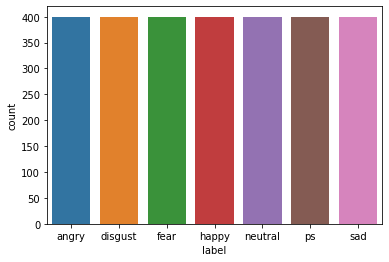

In [7]:
sns.countplot(df['label'])

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr= sr, x_axis ='time', y_axis = 'hz')
    plt.colorbar()

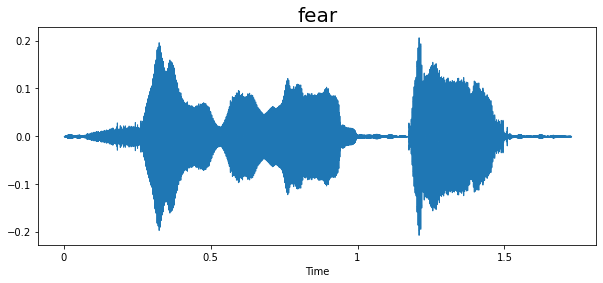

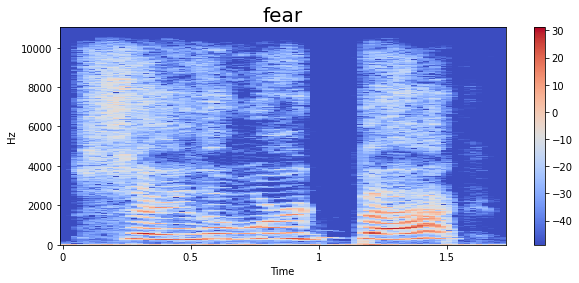

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

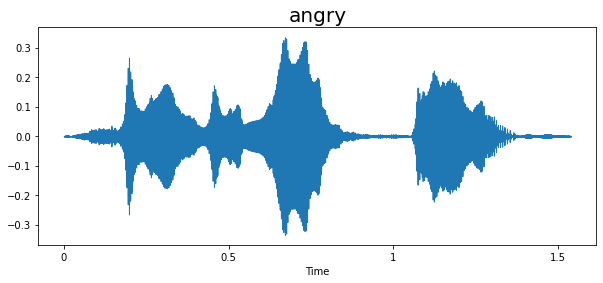

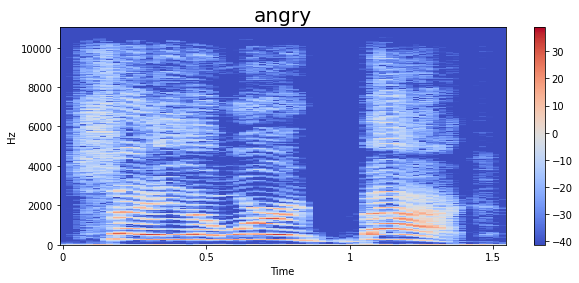

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

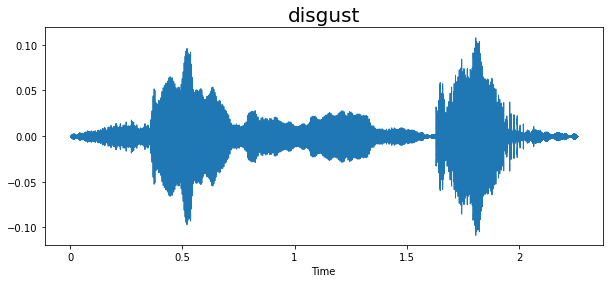

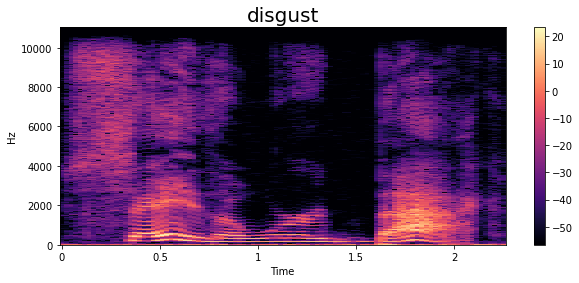

In [11]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

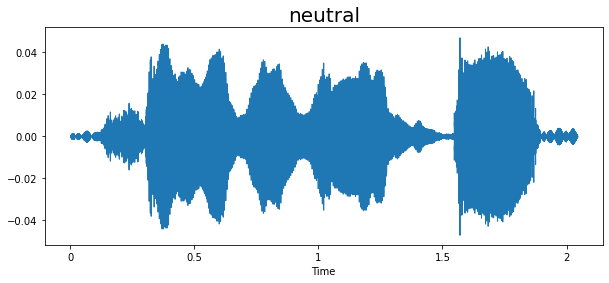

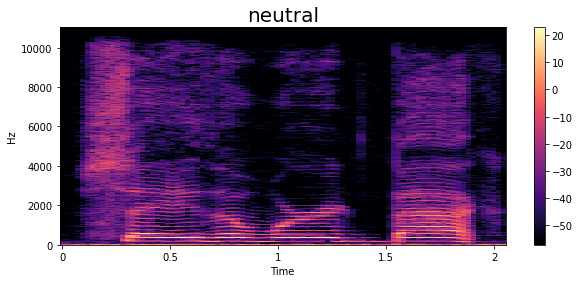

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

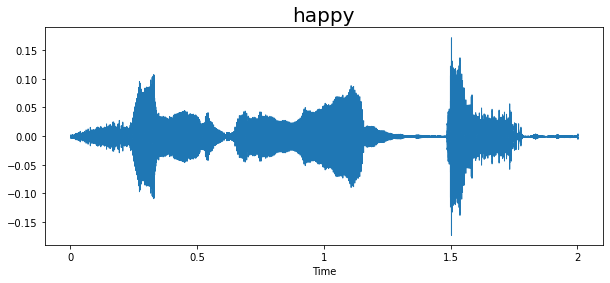

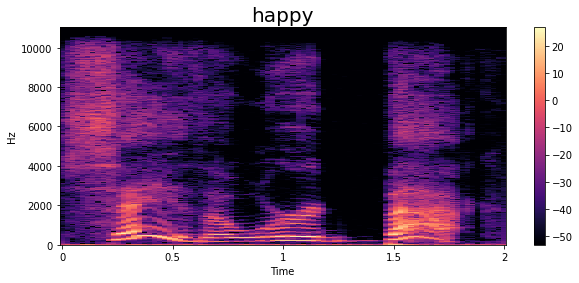

In [13]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

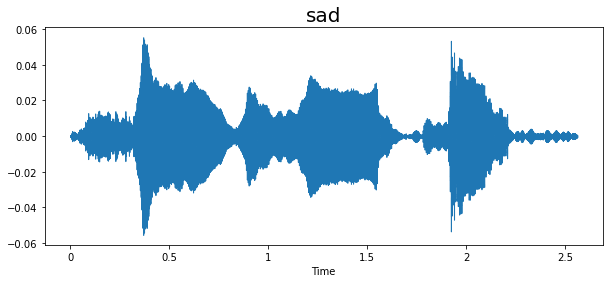

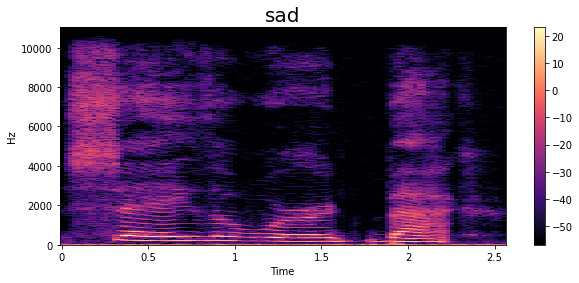

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

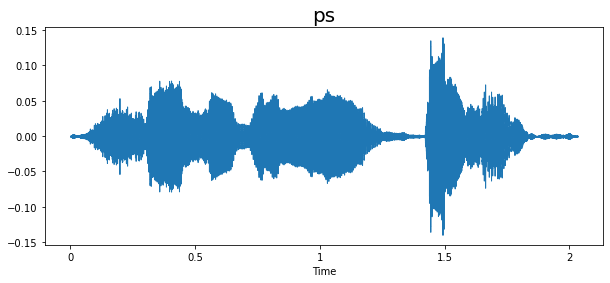

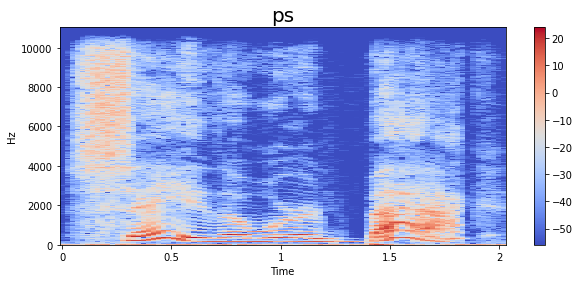

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# feature exraction

In [6]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.2)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis = 0)
    return mfcc

In [6]:
extract_mfcc(df['speech'][0])

array([-378.63693   ,   67.70698   ,  -22.676702  ,  -14.975583  ,
         -4.100679  ,    7.6810036 ,  -29.440214  ,   -5.8702984 ,
        -12.413343  ,   -2.713682  ,   -0.92916805,    1.99103   ,
          0.49353185,    3.5981607 ,    1.6554167 ,    2.8419285 ,
         -5.4888372 ,   -3.7055151 ,   -4.0386324 ,   -9.438538  ,
         -9.222978  ,   -3.3191526 ,  -10.551917  ,   11.422541  ,
         10.380276  ,   26.78352   ,   25.830053  ,   25.804502  ,
         14.984269  ,    7.5717025 ,   -3.4258    ,    5.5674233 ,
          9.344571  ,    7.1261225 ,    2.876776  ,   -3.2704942 ,
          2.8324494 ,    8.313048  ,    2.2593086 ,   -1.9458982 ],
      dtype=float32)

In [7]:
X_mfcc = df['speech'].apply(lambda x : extract_mfcc(x))

In [8]:
X_mfcc

0       [-378.63693, 67.70698, -22.676702, -14.975583,...
1       [-443.23383, 81.00654, -6.4501185, -23.455017,...
2       [-401.1324, 36.869095, -8.890053, 0.72227675, ...
3       [-381.68063, 68.61042, -16.464006, -16.07859, ...
4       [-400.05438, 64.42746, 0.19010434, 9.789938, 5...
                              ...                        
2795    [-391.5526, 74.96181, 28.905535, 48.83158, -5....
2796    [-407.19424, 94.87699, 19.52333, 45.930218, -2...
2797    [-368.91376, 79.244896, 31.98882, 46.27219, -9...
2798    [-420.60037, 81.627304, 25.065878, 42.41621, -...
2799    [-409.07663, 65.96939, 27.747889, 46.27716, -0...
Name: speech, Length: 2800, dtype: object

In [9]:
X = [x for x in X_mfcc]
X = np.array(X)

X = np.expand_dims(X, -1)
X.shape
#X

(2800, 40, 1)

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])



In [11]:
y = y.toarray()

In [12]:
y.shape

(2800, 7)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, shuffle=True)

# Creating the model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten, Activation



# Hyper Parameter Tuning

In [14]:
from kerastuner import RandomSearch

In [15]:
from tensorflow import keras

In [24]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(80, input_shape = (40,), activation='relu'))
    for i in range(hp.Int('num_layers',2, 20 )):
        model.add(Dense(
            units = hp.Int('units_'+str(i), min_value=16,max_value=1024,step = 16),
            activation='relu'
        ))
    model.add(Dense(7, activation= 'softmax'))

    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [27]:
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=5,
    directory = 'project',
    project_name = 'Emotion_Recognition'
)

INFO:tensorflow:Reloading Oracle from existing project project\Emotion_Recognition\oracle.json


In [28]:
tuner.search(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.14000000059604645

Best val_accuracy So Far: 0.9657142758369446
Total elapsed time: 00h 00m 54s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.results_summary()

Results summary
Results in project\Emotion_Recognition
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 368
units_1: 128
units_2: 16
units_3: 16
units_4: 16
units_5: 16
units_6: 16
units_7: 16
Score: 0.9657142758369446
Trial summary
Hyperparameters:
num_layers: 11
units_0: 400
units_1: 352
units_2: 448
units_3: 480
units_4: 480
units_5: 384
units_6: 1024
units_7: 832
units_8: 96
units_9: 512
units_10: 256
units_11: 208
units_12: 496
units_13: 240
units_14: 496
units_15: 592
units_16: 960
units_17: 656
units_18: 368
Score: 0.9614285826683044
Trial summary
Hyperparameters:
num_layers: 19
units_0: 672
units_1: 704
units_2: 400
units_3: 688
units_4: 816
units_5: 528
units_6: 480
units_7: 48
units_8: 16
units_9: 16
units_10: 16
units_11: 16
units_12: 16
units_13: 16
units_14: 16
units_15: 16
units_16: 16
units_17: 16
units_18: 16
Score: 0.8871428370475769
Trial summary
Hyperparameters:
num_layers: 19
units_0: 864
units_1: 144
units_2: 128
units_3: 576
units_4: 54

# Building the Best Model

In [16]:
best_model = Sequential()

best_model.add(Dense(80, kernel_initializer='he_uniform', input_shape = (40,), activation='relu'))
best_model.add(Dense(368, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform' , activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
best_model.add(Dense(7, kernel_initializer='glorot_uniform', activation='softmax'))



best_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [17]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 368)               29808     
                                                                 
 dense_2 (Dense)             (None, 16)                5904      
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                2

# Training the model 

In [18]:
history = best_model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 200, shuffle=True)

Epoch 1/200
66/66 [==============================] - 1s 4ms/step - loss: 4.2676 - accuracy: 0.1890 - val_loss: 1.8192 - val_accuracy: 0.2129
Epoch 2/200
66/66 [==============================] - 0s 2ms/step - loss: 1.7225 - accuracy: 0.2443 - val_loss: 1.6246 - val_accuracy: 0.2843
Epoch 3/200
66/66 [==============================] - 0s 2ms/step - loss: 1.6042 - accuracy: 0.2952 - val_loss: 1.5666 - val_accuracy: 0.2900
Epoch 4/200
66/66 [==============================] - 0s 2ms/step - loss: 1.4609 - accuracy: 0.3019 - val_loss: 1.5167 - val_accuracy: 0.3057
Epoch 5/200
66/66 [==============================] - 0s 2ms/step - loss: 1.3819 - accuracy: 0.3262 - val_loss: 1.3181 - val_accuracy: 0.3614
Epoch 6/200
66/66 [==============================] - 0s 2ms/step - loss: 1.2657 - accuracy: 0.3719 - val_loss: 1.3693 - val_accuracy: 0.3357
Epoch 7/200
66/66 [==============================] - 0s 2ms/step - loss: 1.2986 - accuracy: 0.3919 - val_loss: 1.1882 - val_accuracy: 0.4143
Epoch 8/200
6

# Creting the Labels and Stuff

In [26]:
labels = {
    0 : "Angry",
    1 : "Disgust",
    2 : "Fear",
    3 : "Happy",
    4 : "Neutral",
    5 : "Pleasant Surprise",
    6 : "Sad"
}

In [40]:
def get_prediction(filename, model):
    prediction = features_extractor(filename)
    prediction = prediction.reshape(1,-1)
    pred = model.predict(prediction)
    label = np.argmax(pred)
    return labels[label]
    

# Checking for a real life voice

In [46]:
s_filename = r'D:\College\Year - 3\Fall sem\FDA\Project\test\ishaa_wav.wav'


In [38]:
get_prediction(s_filename)

1/1 [==============================] - 0s 12ms/step


'Disgust'

# Exporting the Model

In [39]:
from keras.models import load_model
best_model.save("emotion_predictor.h5")

In [41]:
loaded_model = load_model("emotion_predictor.h5")


In [44]:
loss, accuracy = loaded_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 857us/step - loss: 0.0424 - accuracy: 0.9943


In [45]:
X_test

array([[[-3.8097989e+02],
        [ 8.6081917e+01],
        [-2.5776121e-01],
        ...,
        [ 9.7873430e+00],
        [ 6.1544909e+00],
        [ 5.9785147e+00]],

       [[-4.4266440e+02],
        [ 9.5622223e+01],
        [ 4.5787845e+00],
        ...,
        [ 1.1814449e+01],
        [ 9.2771997e+00],
        [ 1.2543840e+01]],

       [[-3.2234183e+02],
        [ 3.8671734e+01],
        [-2.4440477e+01],
        ...,
        [-2.2538927e+00],
        [-3.8166888e+00],
        [ 3.2030997e-01]],

       ...,

       [[-3.1315472e+02],
        [ 6.2439472e+01],
        [-1.5553245e+01],
        ...,
        [-6.9965243e-01],
        [-2.3405993e+00],
        [ 3.6863039e+00]],

       [[-4.3556754e+02],
        [ 6.3853657e+01],
        [ 2.7953693e-01],
        ...,
        [ 9.8688946e+00],
        [-2.0278943e+00],
        [ 2.8222251e+00]],

       [[-3.1441534e+02],
        [ 5.8658840e+01],
        [-3.2430965e+01],
        ...,
        [-5.0177264e-01],
        [ 8.660

In [47]:
get_prediction(s_filename, loaded_model)

1/1 [==============================] - 0s 13ms/step


'Pleasant Surprise'